# <div align="center"><b> APSERa Simulation Pipeline </b></div>


## **<div align="center"><b> Importing required packages </b></div>**


### Ensure that 3 file paths are set correctly for your machine before running
#### 1. beam_path : This contains the beam files
#### 2. PATH : this contains path to the fitting functions
#### 3. datafile_path : This is where the output residual after fitting will be saved
#### 4. sky_map_path : Where the sky maps are located
#### 5. recomb_path : Where the recombination line data is located

In [1]:
#beam_path = "/home/linux2/Downloads/Farfield/farfield_finite/140mm_ground"            
beam_path = "/home/mayuris/workspace/RRI_DISTORTION_Lab/APSERa/Keerthi_thesis/Data/Antenna_meas/140mm_ground"

#PATH = '/home/linux2/Downloads/msfitcodes/'
PATH = '/home/mayuris/workspace/saras3/'


#datafile_path = "/home/linux2/Downloads/Farfield/farfield_finite/140mm_ground/residues_final.txt"
datafile_path = "/home/mayuris/workspace/RRI_DISTORTION_Lab/APSERa/Keerthi_thesis/residues_final.txt"

#sky_map_path = "."
sky_map_path = "/home/narendras/apsera/sky_model"

#recomb_path = "."
recomb_path = "/home/narendras/apsera/Theory"

In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import ephem
from scipy.signal import correlate

from scipy.optimize import curve_fit

%matplotlib inline
from pygdsm import GlobalSkyModel
from pygdsm import GSMObserver
from datetime import datetime


from astropy.timeseries import TimeSeries, BinnedTimeSeries
from astropy.time import Time, TimeDelta
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz, Angle
import astropy.units as u

import pandas as pd
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator
import os



## **<div align="center"><b> Time and number of spectra </b></div>**


In [3]:
start_time_in_UTC = '2024-01-12 11:00:00'
n_spectra = 1                  #Number of spectra to be taken
delta_t_in_hours = 1            #Time interval between each spectra needed in hours

t = Time(start_time_in_UTC, format = 'iso', scale= 'utc')

ts = TimeSeries(time_start= start_time_in_UTC, time_delta= delta_t_in_hours *u.hour, n_samples= n_spectra)
ts = ts.time
print(ts)

['2024-01-12 11:00:00.000']


## **<div align="center"><b> Antenna beam </b></div>**


In [4]:
# import os
# import glob
# import numpy as np
# from scipy import interpolate

# ## In the rt_file, mention the filename of S11. Please check if it is in linear form. 

# rt_file    = 'dipole_correct.txt'
# file_list  = sorted(glob.glob(os.path.join(beam_path,"*farfield*.txt")))
# #print(file_list)



# gamme_file = os.path.join(beam_path, rt_file)

# gamma_freq = []
# gamma_val  = []

# with open(gamme_file) as fa:
#     for line_aa in fa.readlines()[2:]:
#         line_aa = line_aa.strip()
#         col1    = line_aa.split('\t')
#         _freq   = np.array(list(map(float, col1[0].split())))[0]
#         _val    = np.array(list(map(float, col1[1].split())))[0]
#         gamma_freq.append(_freq)
#         gamma_val.append(_val)
        
# gamma_freq = np.array(gamma_freq)
# gamma_val  = np.array(gamma_val)
# gamma_val=10**(gamma_val/20)

# print(gamma_freq)
# print(gamma_val)
# gamma_func = interpolate.interp1d(gamma_freq, gamma_val)


# ## This below print statement is to verify our interpolation. print(gamma_func(any freq value)) 
# ## and check if it matches the value in the file
# #print(gamma_func(2.8))


# ## The below code is for the beam definition. Please make sure to check the beam_def function before proceeding

# phi_res   = 1
# theta_res = 1

# phi_array   = np.arange(0, 360, phi_res)
# theta_array = np.arange(90, -90-theta_res, -theta_res) 
# freq_array  = []
# file_array  = []

# def get_freq_from_file(filename):
#     _temp = os.path.basename(filename).replace('.txt','').replace('farfield','').replace('(f=','').replace(')','').replace('[1]','')
#     return float(_temp)
    
# for ii, file_add in enumerate(file_list):
#     freq_array.append(get_freq_from_file(file_add))
#     file_array.append(file_add)
    
# print(get_freq_from_file('farfield(f=2.608)[1].txt'))
    
# np.testing.assert_array_equal(file_array, file_list)

# freq_array = np.array(freq_array)
# file_array = np.array(file_array)

# isort      = np.argsort(freq_array)
# freq_array = freq_array[isort]
# file_array = file_array[isort]

# beam_3D_unnorm = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

# for ii, freq in enumerate(freq_array):
#     print("Processing frequency {} GHz".format(freq))
#     file_add = file_array[ii]
#     with open(file_add) as fa:
#         for line_aa in fa.readlines()[2:]:
#             line_aa = line_aa.strip()
#             col1    = line_aa.split('\t')
#             all_val = np.array(list(map(float, col1[0].split())))

#             theta   = 90-all_val[0] 
#             phi     = all_val[1]
#             beam    = all_val[2]
#            # print(theta)
            

#             iphi    = np.where(phi_array==phi)[0][0]
#             itheta  = np.where(theta_array==theta)[0][0]
#             beam_3D_unnorm[ii, itheta, iphi] = 10**(beam/10)
            


# beam_3D = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

# #print(beam_3D_unnorm[0, :,:].shape)


# for ifreq in range(beam_3D.shape[0]):
#     for itheta in range(beam_3D.shape[1]):
#         for iphi in range(beam_3D.shape[2]):
#             beam_3D[ifreq, itheta,iphi] = beam_3D_unnorm[ifreq, itheta,iphi]/np.amax(beam_3D_unnorm[ifreq,:,:])


# print(freq_array)    

        
# theta_array_new = np.flip(theta_array)
# phi_array_new   = phi_array
# beam_3D_flip=np.flip(beam_3D,axis=1)
# #print(beam_3D_flip[2,:,0],beam_3D[2,:,0])
# from scipy.interpolate import RegularGridInterpolator
# my_interpolating_function = RegularGridInterpolator((freq_array, theta_array_new,
#                                                      phi_array_new), beam_3D_flip)
# #print(my_interpolating_function.shape)



# ## Beam definition
# ## If only the effect of S11 has to be checked (with ideal antenna beam), use the sin^(theta) beam. 



# def beam_def(freq, alt, az):
#     return float(my_interpolating_function([freq, alt, az]))
#     #if (alt<=0):
#      #   return 0
#     #else:
#      #   return (math.sin(alt*PI/180)*math.sin(alt*PI/180))


    
# plt.plot(gamma_freq, gamma_val)
# plt.xlim([2,4])
# plt.show()

In [5]:
#alt == theta angle; az == phi angle; both in degrees
def beam_def(freq, alt, az):
    if (alt<=0):
        return 0
    else:
        return (math.sin(alt*PI/180)*math.sin(alt*PI/180))

#since this sample beam sin^2 theta doesn't have any phi dependence (and we want our beams to be freq independent ideally)

## **<div align="center"><b> Definitions </b></div>**


In [6]:
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 2.5                  #Check the f_start and f_stop and change the number of channels accordingly
f_stop = 4
No_of_Channels = 251     #Set either no. of channels or channel width first, other is derived from this
Channel_width = 0.0059761          #Bandwidth / no. of channels
N_SIDE = 16                   #Healpy parameter: resolution of the map is defined by the NSIDE parameter, which is generally a power of 2.
T_hot = 3730
T_cold = 2730                    #T_cold and T_hot in Kelvins (for atmospheric corrections to calculate noise added) purposefully taken to be a few thousands
Time_in_UTC = ts
latitude = -26.70331940
longitude =116.67081524            #Latitude and longitude in degrees
altitude = 10                     #Altitude in meters
alpha = 0.0065                   #Temp. lapse rate (deg C per meter); related to atmospheric corrections
PI = 3.14159265
Noise_int_time = 3e+13
Trx = 14                        # Receiver temperature in Kelvin
T_atm = 1                       # Noise temp added by atmosphere 
freqs = np.linspace(f_start,f_stop, No_of_Channels)

#create arrays 
CMB_Int = np.empty([No_of_Channels])
P_hot = np.empty(No_of_Channels)
P_cold = np.empty(No_of_Channels)
P_dif = np.empty(No_of_Channels)





#sky temperature in real and noise temperature stored in imaginary part
cross_real = [0]*No_of_Channels
cross_imag = [0]*No_of_Channels
sumwt = [0]*No_of_Channels
sigma = [0]*No_of_Channels     #noise per channel
spectra = [0]*n_spectra
#spectra_new=[0]*n_spectra
spectra_cross_imag = [0]*n_spectra
NPIX = hp.nside2npix(N_SIDE)
print("Number of pixels for NSIDE ",N_SIDE," is ",NPIX)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        N_SIDE, hp.nside2resol(N_SIDE, arcmin=True) / 60
    )
)


picy = [[0]*No_of_Channels]*NPIX  #2D Array storing pixel values and freq


#Refraction correction formula
def refraction(alt_in_deg, altitude):
    pres = 1010.*math.pow((1-6.5/288000*altitude),5.255)
    if (altitude>11000):
        temp = 211.5
    else:
        temp = 283.0 - (alpha * altitude)
    R = 1.02/math.tan((alt_in_deg + (10.3/(alt_in_deg + 5.11)))*(PI/180))
    if (alt_in_deg == 90):
        R = R+ 0.0019279
    tpcor = (pres/1000) * (283/temp)
    R =  tpcor*(R/60)
    return alt_in_deg +R



Obs = ephem.Observer()
#print(Obs)
t = Time(Time_in_UTC, scale='utc',location= EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m))
lst = t.sidereal_time('apparent')
print("LST:",lst)
print("Beam weight at arbitrary point",beam_def(2.8,70,20))
#plt.xlabel('Altitutde')
#plt.ylabel('Gain')
#plt.plot(theta_array_new[1:180],beam_3D_flip[50,1:180,0])

#plt.plot(beam_3D[100,1:90,0])



Number of pixels for NSIDE  16  is  3072
Approximate resolution at NSIDE 16 is 3.7 deg
LST: [2h12m27.8765351s]
Beam weight at arbitrary point 0.8830222206621379


In [7]:
ov = GSMObserver()
elevation=45
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2024, 1, 12, 22, 00)

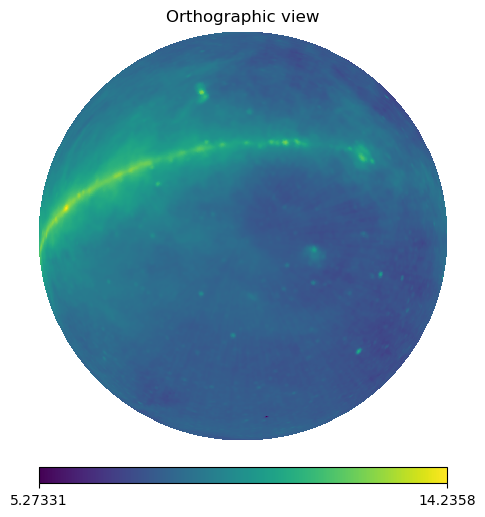

In [8]:
ov.generate(150)
sky_dome_view = ov.view(logged=True)

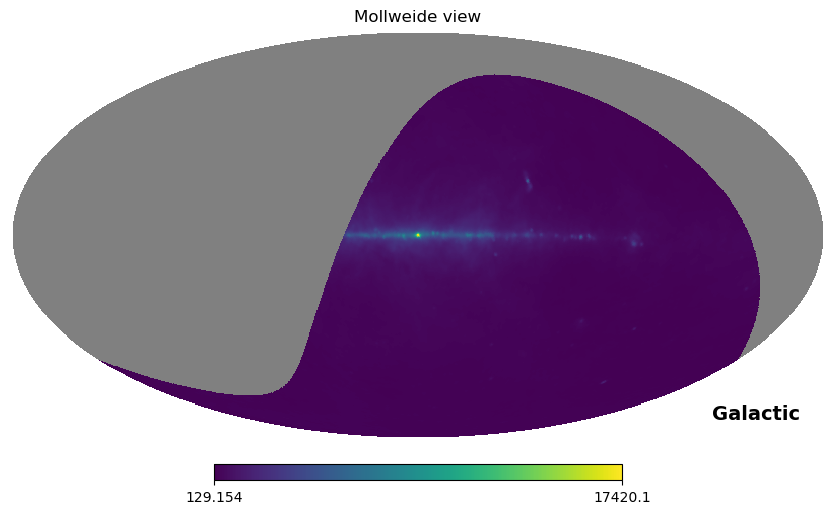

In [9]:
sky_moll_view = ov.view_observed_gsm()

In [10]:
low_res_sky = hp.pixelfunc.ud_grade(sky_moll_view,nside_out=N_SIDE)

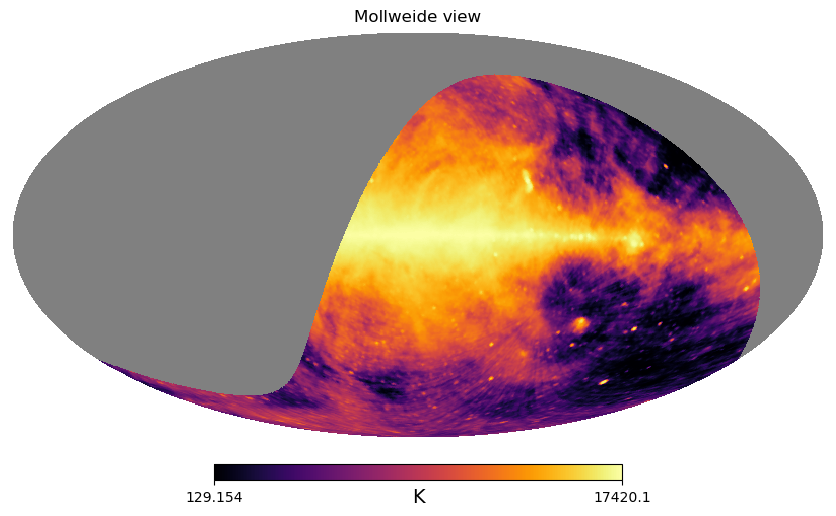

In [11]:
hp.mollview(sky_moll_view,cmap='inferno',unit='K',norm='hist')

## <div align="center"><b> Getting maps, calculating CMB intensity </b></div>


In [12]:
gsm = GlobalSkyModel(freq_unit='GHz')

CMB_Int = ((2*h*1e+27*freqs**3)/(c*c))/(np.exp((h*freqs*1e+9)/(k*TCMB))-1)    #Planck formula; units: W m-2 Sr-2 Hz-1
#print(CMB_Int)
print("Got CMB Int!")

#P_hot and P_cold for calibration
P_hot = (2*h*freqs*1e9)/(np.exp((h*freqs*1e9)/(k*T_hot))-1)
P_cold = (2*h*freqs*1e9)/(np.exp((h*freqs*1e9)/(k*T_cold))-1)
P_dif = P_hot -P_cold
#print(P_hot)
print("Got P_dif for calibration!")

#hp.ud_grade: Upgrade or degrade resolution of a map 

sky_1420 = hp.ud_grade(np.loadtxt(os.path.join(sky_map_path, '1420MHz_Sky_map.txt')) - TCMB, N_SIDE)   

sky_408 = hp.ud_grade(((np.loadtxt(os.path.join(sky_map_path,'408MHz_Sky_map.txt')))/1000) - TCMB, N_SIDE)

sky_23000 = hp.ud_grade((np.loadtxt(os.path.join(sky_map_path,'23000MHz_Sky_map.txt'))/1000), N_SIDE)

print("Got 408MHz, 1420MHz and 23000MHz maps for power law fitting!")

Got CMB Int!
Got P_dif for calibration!
Got 408MHz, 1420MHz and 23000MHz maps for power law fitting!


## <div align="center"><b> Getting recombination lines </b></div>


/tmp/ipykernel_3545/3136782670.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(recomb_file,sep= "    " ,header = None)


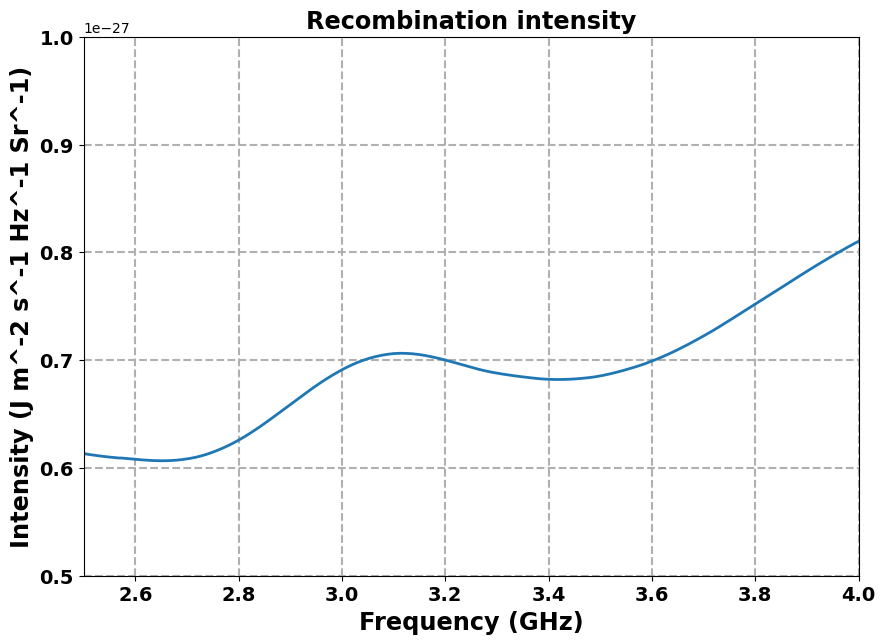

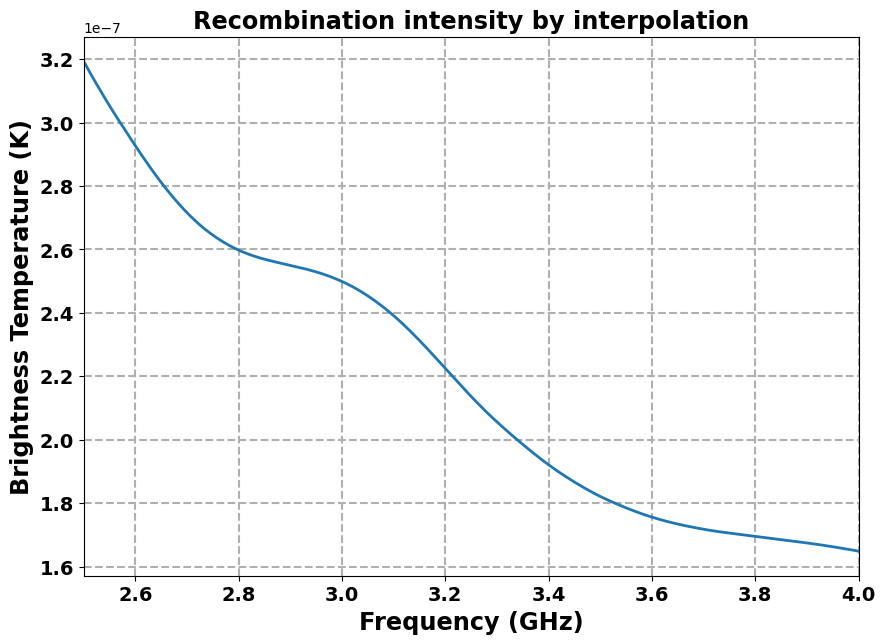

In [13]:
recomb_file = os.path.join(recomb_path,'total_spec_new.txt')
df = pd.read_csv(recomb_file,sep= "    " ,header = None)
df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]

x = df["Frequency"]
y= df["Intensity"]

plt.figure(figsize=(10, 7))
#plt.plot((df['Frequency']), (df['Intensity']),linewidth=2)
plt.plot(x, y,linewidth=2)
plt.title('Recombination intensity', fontsize='xx-large', fontweight='bold')
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)', fontsize='xx-large', fontweight='bold')
plt.xlim([f_start,f_stop])
plt.ylim([0.5e-27,1e-27])
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()

ius = InterpolatedUnivariateSpline(x, y)   #1-D interpolating spline for a given set of data points; default k=3 being cubic spline
Rec_int = ius(freqs)

#plt.figure(figsize=(10, 7))
#plt.title('Recombination intensity via cubic spline interpolation', fontsize='xx-large', fontweight='bold')
#plt.plot(freqs, Rec_int,linewidth=2)
#plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
#plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)', fontsize='xx-large', fontweight='bold')
# plt.xlim([f_start,f_stop])
# plt.ylim([0.5e-27,1e-27])
# plt.xticks(fontsize = 14, fontweight='bold')
# plt.yticks(fontsize = 14, fontweight='bold')
# plt.grid(linewidth=1.5, linestyle='--')
# plt.show()

#In terms of temperature
temp_recom=(((c**2)*Rec_int)/(2*k*(freqs**2)*1e18))#/(8*np.pi)
plt.figure(figsize=(10, 7))
plt.title('Recombination intensity by interpolation', fontsize='xx-large', fontweight='bold')
plt.plot(freqs, temp_recom,linewidth=2)
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.ylabel('Brightness Temperature (K)', fontsize='xx-large', fontweight='bold')
plt.xlim([f_start,f_stop])
# plt.ylim([0.5e-27,1e-27])
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()

# 


## <div align="center"><b> Getting spectra </b></div>


/tmp/ipykernel_3545/1001295790.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)


Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
2.904555876428341
2.903014990038366
No. of spectra got =  1


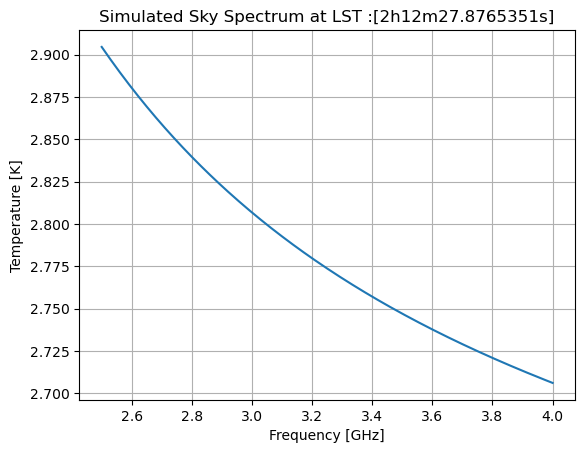

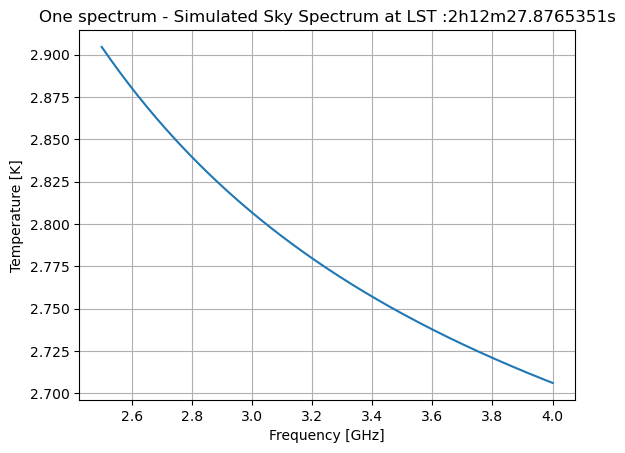

251


In [26]:

t = 0
while t<n_spectra:
    i=1
    while i<NPIX:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i, nest = True, lonlat = True) #pix2ang = gives l and b coordinates for each pixel; NSIDE=16 (3.7 deg resolution)
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')  #astropy.units as u
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value  #gives alt value from equi
        new_alt = refraction(alt, altitude) 
      
        #Using power law relation to fit spectra of three frequency maps
        def func(xx, a):
            return (sky_408)[i-1] * np.power((xx/0.408), a)     #Tsky(freq)=T408(f/f408)^(-a)

        xx = np.array([0.408, 1.420, 23])
        yy = np.array([sky_408[i-1], sky_1420[i-1], sky_23000[i-1]])

        popt, pcov = curve_fit(func, xx, yy)   #popt: best fit spectral index for each pixel
        

        #print(freqs)
        j=0
        longitudes = equi.az.value
        while j< No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt = beam_def(freqs[j], new_alt, longitudes)   #beam weight
            #print(new_alt,cwt)
            if (cwt>0):     #Adding all the three intensities

                map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)
                tot_intensity=map_1 + CMB_Int[j]+Rec_int[j]
                conv_beamxsky=tot_intensity*cwt#* (1 - np.power(gamma_func(freqs[j]),2))
                Power = (conv_beamxsky) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot                
                cross_real[j] = cross_real[j] + final_temp
                sumwt[j] = sumwt[j]+ cwt


                # map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)
                # Power = (map_1 + CMB_Int[j]+Rec_int[j]) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                # final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot
                
                # cross_real[j] = cross_real[j] + cwt*final_temp#* (1 - np.power(gamma_func(freqs[j]),2))
                
                # ## Remove the (1 - np.power(gamma_func(freqs[j]),2)) to try for ideal antenna (no return loss)
                
                # sumwt[j] = sumwt[j]+ cwt   #sumwt has cumulative beam weigths
               
            
            j = j+1
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i = i+1

    
    i=0    #index i for below loop is channel number
    while(i< No_of_Channels):
        if sumwt[i]>0:
            cross_real[i] = cross_real[i]/sumwt[i]
        i = i+1
        
    
    #print(sumwt[1])
    #print(sumwt[2])
    #print(sumwt[100])
    #print(sumwt[No_of_Channels-1])
    
    sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    #radiometer equation
    
    #Generating an array of random integers with mean 0 and std 1. 
    array = np.random.normal(0,1,No_of_Channels)

    #Adding the gaussian error
    
    cross_real = cross_real + array*sigma       #cross_real has Tsky
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions
                                                    
    cross_imag = cross_imag + array*sigma       #cross_imag has noise (to keep track of noise terms, which is also added to real part)
    
    spectra[t] = cross_real
    np.savetxt('old1_spec_before.out', cross_real, delimiter=',')
    spectra_cross_imag[t] = cross_imag
    print(cross_real[0])
    print(cross_real[1])

    
    cross_real = [0]*No_of_Channels
    cross_imag = [0]*No_of_Channels
    sumwt = [0]*No_of_Channels
    sigma = [0]*No_of_Channels   #assigning all the above 4 parameters to zero valued arrays
    
    print("No. of spectra got = ", t+1)
    
    t = t+1

###end of one timestamp

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
lst = t.sidereal_time('apparent')



i=0
while(i<n_spectra):
    plt.plot(freqs, spectra[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s'%lst)
plt.grid()
plt.show()

plt.plot(freqs, spectra[0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s'%lst[0])
plt.grid()
plt.show()
print(len(spectra[0]))



Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
2.904555875546995
2.9030149890878594
No. of spectra got =  1


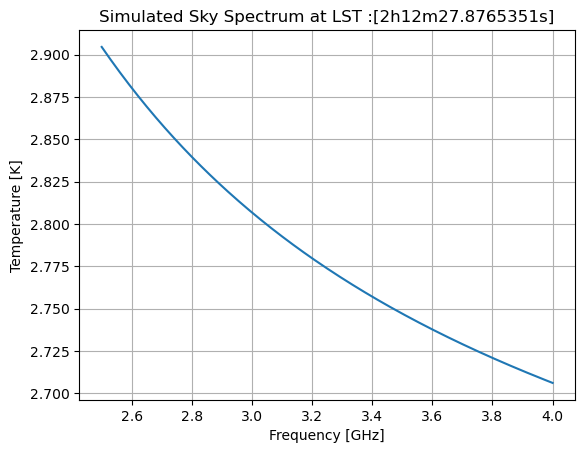

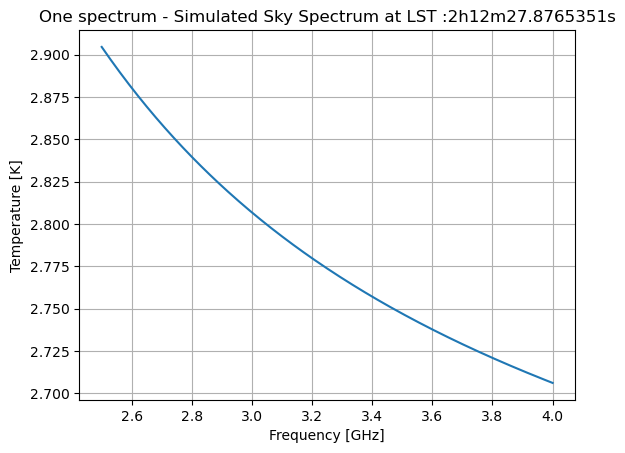

In [27]:
sindex=np.loadtxt("spec_index_new.out", delimiter=',')
t = 0
while t<n_spectra:
    i=1
    while i<NPIX:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i, nest = True, lonlat = True) #pix2ang = gives l and b coordinates for each pixel; NSIDE=16 (3.7 deg resolution)
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')  #astropy.units as u
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value  #gives alt value from equi
        new_alt = refraction(alt, altitude) 
      
        #Using power law relation to fit spectra of three frequency maps
        def func(xx, a):
            return (sky_408)[i-1] * np.power((xx/0.408), a)     #Tsky(freq)=T408(f/f408)^(-a)

        xx = np.array([0.408, 1.420, 23])
        yy = np.array([sky_408[i-1], sky_1420[i-1], sky_23000[i-1]])

        popt, pcov = curve_fit(func, xx, yy)   #popt: best fit spectral index for each pixel
        

        #print(freqs)
        j=0
        longitudes = equi.az.value
        while j< No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt = beam_def(freqs[j], new_alt, longitudes)   #beam weight
            #print(new_alt,cwt)
            if (cwt>0):     #Adding all the three intensities

                #map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)
                map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(sindex[i-1])))/ (c**2)
                tot_intensity=map_1 + CMB_Int[j]+Rec_int[j]
                conv_beamxsky=tot_intensity*cwt#* (1 - np.power(gamma_func(freqs[j]),2))
                Power = (conv_beamxsky) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot                
                cross_real[j] = cross_real[j] + final_temp
                sumwt[j] = sumwt[j]+ cwt


                # map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)
                # Power = (map_1 + CMB_Int[j]+Rec_int[j]) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                # final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot
                
                # cross_real[j] = cross_real[j] + cwt*final_temp#* (1 - np.power(gamma_func(freqs[j]),2))
                
                # ## Remove the (1 - np.power(gamma_func(freqs[j]),2)) to try for ideal antenna (no return loss)
                
                # sumwt[j] = sumwt[j]+ cwt   #sumwt has cumulative beam weigths
               
            
            j = j+1
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i = i+1

    
    i=0    #index i for below loop is channel number
    while(i< No_of_Channels):
        if sumwt[i]>0:
            cross_real[i] = cross_real[i]/sumwt[i]
        i = i+1
        
    
    #print(sumwt[1])
    #print(sumwt[2])
    #print(sumwt[100])
    #print(sumwt[No_of_Channels-1])
    
    sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    #radiometer equation
    
    #Generating an array of random integers with mean 0 and std 1. 
    array = np.random.normal(0,1,No_of_Channels)

    #Adding the gaussian error
    
    cross_real = cross_real + array*sigma       #cross_real has Tsky
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions
                                                    
    cross_imag = cross_imag + array*sigma       #cross_imag has noise (to keep track of noise terms, which is also added to real part)
    
    spectra[t] = cross_real
    np.savetxt('old1_spec_before.out', cross_real, delimiter=',')
    spectra_cross_imag[t] = cross_imag
    print(cross_real[0])
    print(cross_real[1])

    
    cross_real = [0]*No_of_Channels
    cross_imag = [0]*No_of_Channels
    sumwt = [0]*No_of_Channels
    sigma = [0]*No_of_Channels   #assigning all the above 4 parameters to zero valued arrays
    
    print("No. of spectra got = ", t+1)
    
    t = t+1

###end of one timestamp

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
lst = t.sidereal_time('apparent')



i=0
while(i<n_spectra):
    plt.plot(freqs, spectra[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s'%lst)
plt.grid()
plt.show()

plt.plot(freqs, spectra[0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s'%lst[0])
plt.grid()
plt.show()




/tmp/ipykernel_3545/300727126.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sindex_old[i-1]=popt
/tmp/ipykernel_3545/300727126.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)


Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000


Error encountered at /home/conda/feedstock_root/build_artifacts/healpy_1701009869382/work/healpixsubmodule/src/cxx/Healpix_cxx/healpix_base.cc, line 976
(function void T_Healpix_Base<I>::pix2loc(I, double&, double&, double&, bool&) const [with I = long int])

must not happen

/home/narendras/anaconda3/envs/apsera1/lib/python3.12/site-packages/erfa/core.py:4642: RuntimeWarning: invalid value encountered in ld
  p1 = ufunc.ld(bm, p, q, e, em, dlim)
/home/narendras/anaconda3/envs/apsera1/lib/python3.12/site-packages/erfa/core.py:19026: RuntimeWarning: invalid value encountered in anp
  c_retval = ufunc.anp(a)
/home/narendras/anaconda3/envs/apsera1/lib/python3.12/site-packages/erfa/core.py:4058: RuntimeWarning: invalid value encountered in atioq
  aob, zob, hob, dob, rob = ufunc.atioq(ri, di, astrom)


2.9045558762657113
2.9030149887370897
No. of spectra got =  1


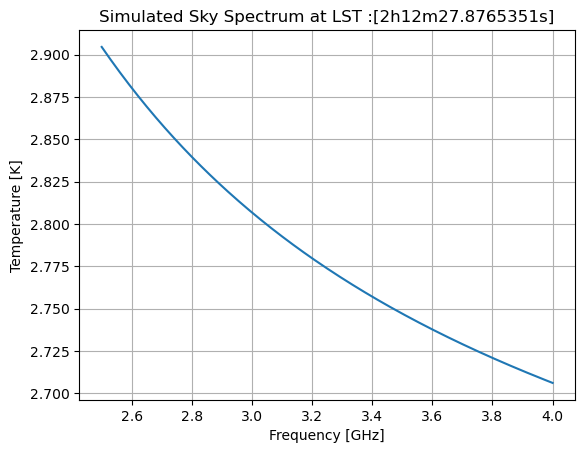

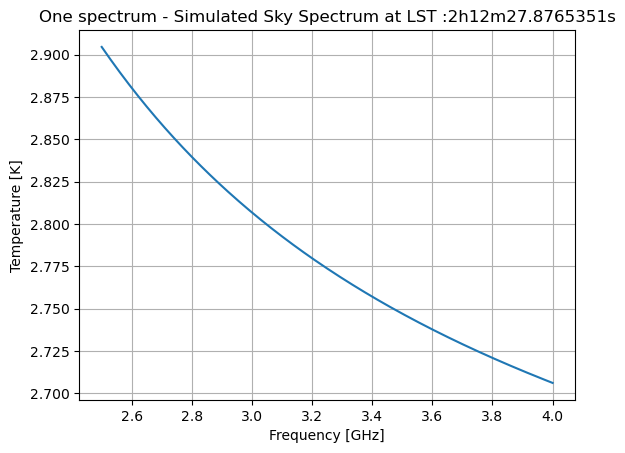

251


In [28]:
################FINAL

t = 0
while t<n_spectra:
    sindex_old=np.zeros(NPIX)
    i=1
    while i<NPIX+1:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i, nest = True, lonlat = True) #pix2ang = gives l and b coordinates for each pixel; NSIDE=16 (3.7 deg resolution)
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')  #astropy.units as u
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value  #gives alt value from equi
        new_alt = refraction(alt, altitude) 
      
        #Using power law relation to fit spectra of three frequency maps
        def func(xx, a):
            return (sky_408)[i-1] * np.power((xx/0.408), a)     #Tsky(freq)=T408(f/f408)^(-a)

        xx = np.array([0.408, 1.420, 23])
        yy = np.array([sky_408[i-1], sky_1420[i-1], sky_23000[i-1]])

        popt, pcov = curve_fit(func, xx, yy)   #popt: best fit spectral index for each pixel
        sindex_old[i-1]=popt

        #print(freqs)
        j=0
        longitudes = equi.az.value
        while j< No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt = beam_def(freqs[j], new_alt, longitudes)   #beam weight
            #print(new_alt,cwt)
            if (cwt>0):     #Adding all the three intensities

                map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)
                tot_intensity=map_1 + CMB_Int[j]+Rec_int[j]
                conv_beamxsky=tot_intensity*cwt#* (1 - np.power(gamma_func(freqs[j]),2))
                Power = (conv_beamxsky) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot                
                cross_real[j] = cross_real[j] + final_temp
                sumwt[j] = sumwt[j]+ cwt


                # map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(popt)))/ (c**2)
                # Power = (map_1 + CMB_Int[j]+Rec_int[j]) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                # final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot
                
                # cross_real[j] = cross_real[j] + cwt*final_temp#* (1 - np.power(gamma_func(freqs[j]),2))
                
                # ## Remove the (1 - np.power(gamma_func(freqs[j]),2)) to try for ideal antenna (no return loss)
                
                # sumwt[j] = sumwt[j]+ cwt   #sumwt has cumulative beam weigths
               
            
            j = j+1
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i = i+1

    
    i=0    #index i for below loop is channel number
    while(i< No_of_Channels):
        if sumwt[i]>0:
            cross_real[i] = cross_real[i]/sumwt[i]
        i = i+1
        
    
    #print(sumwt[1])
    #print(sumwt[2])
    #print(sumwt[100])
    #print(sumwt[No_of_Channels-1])
    
    sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    #radiometer equation
    
    #Generating an array of random integers with mean 0 and std 1. 
    array = np.random.normal(0,1,No_of_Channels)

    #Adding the gaussian error
    
    cross_real = cross_real + array*sigma       #cross_real has Tsky
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions
                                                    
    cross_imag = cross_imag + array*sigma       #cross_imag has noise (to keep track of noise terms, which is also added to real part)
    
    spectra[t] = cross_real
    np.savetxt('old_final.out', cross_real, delimiter=',')
    spectra_cross_imag[t] = cross_imag
    print(cross_real[0])
    print(cross_real[1])

    
    cross_real = [0]*No_of_Channels
    cross_imag = [0]*No_of_Channels
    sumwt = [0]*No_of_Channels
    sigma = [0]*No_of_Channels   #assigning all the above 4 parameters to zero valued arrays
    
    print("No. of spectra got = ", t+1)
    np.savetxt('spec_index_old.out', sindex_old, delimiter=',')
    
    t = t+1

###end of one timestamp

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
lst = t.sidereal_time('apparent')



i=0
while(i<n_spectra):
    plt.plot(freqs, spectra[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s'%lst)
plt.grid()
plt.show()

plt.plot(freqs, spectra[0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s'%lst[0])
plt.grid()
plt.show()
print(len(spectra[0]))



/tmp/ipykernel_429223/1386710689.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sindex[i]=popt


2.9045558771801527
2.903014986429461
No. of spectra got =  1


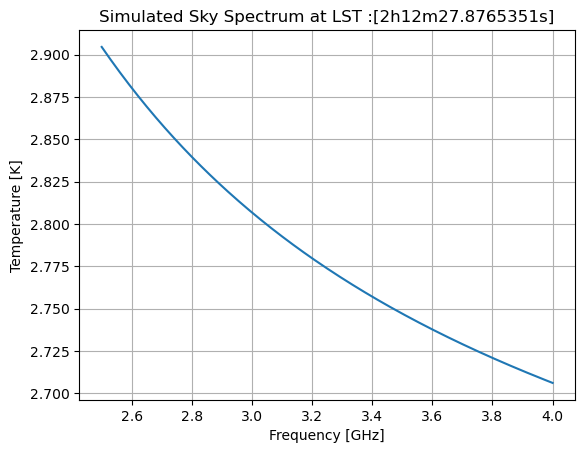

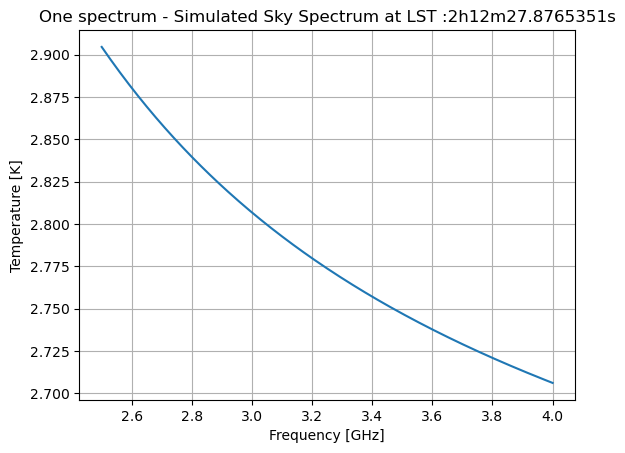

In [15]:
# newalt=np.zeros(NPIX)
# sindex=np.zeros(NPIX)
# t=0
# while t<n_spectra:
#     j=0
#     while j< No_of_Channels:
#         i=0
#         while i<NPIX:
#             if (j==0):
#                 coords = hp.pixelfunc.pix2ang(16, i , nest = True, lonlat = True)
#                 gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
#                 equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
#                 alt = equi.alt.value
#                 new_alt = refraction(alt, altitude)
#                 newalt[i]=new_alt
#                 def func(xx, a):
#                     return (sky_408)[i-1] * np.power((xx/0.408), a)     #Tsky(freq)=T408(f/f408)^(-a)

#                 xx = np.array([0.408, 1.420, 23])
#                 yy = np.array([sky_408[i-1], sky_1420[i-1], sky_23000[i-1]])

#                 popt, pcov = curve_fit(func, xx, yy)
#                 sindex[i]=popt
        
#             cwt = beam_def(freqs[j], newalt[i], longitudes)
#             if (cwt>0):     #Adding all three intensities at all positive beam weights

#                 map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(sindex[i])))/ (c**2)
#                 Power = (map_1 + CMB_Int[j]+Rec_int[j]) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
#                 final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot                
#                 cross_real[j] = cross_real[j] + cwt*final_temp#* (1 - np.power(gamma_func(freqs[j]),2))
#                 sumwt[j] = sumwt[j]+ cwt
#                 #print("inside loop pixel and no.",i)
#             i+=1

#         if sumwt[j]>0:
#             cross_real[j] = cross_real[j]/sumwt[j]


#         j+=1

#     sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)
#     array = np.random.normal(0,1,No_of_Channels)

#     cross_real = cross_real + array*sigma       #cross_real has Tsky
#     cross_imag = cross_imag + array*sigma       #cross_imag has noise (to keep track of noise terms, which is also added to real part)
    
#     spectra[t] = cross_real
#     spectra_cross_imag[t] = cross_imag
#     print(cross_real[0])
#     print(cross_real[1])
    
#     cross_real = [0]*No_of_Channels
#     cross_imag = [0]*No_of_Channels
#     sumwt = [0]*No_of_Channels
#     sigma = [0]*No_of_Channels   #assigning all the above 4 parameters to zero valued arrays
    
#     print("No. of spectra got = ", t+1)
#     t+=1
# Obs = ephem.Observer()
# t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
# lst = t.sidereal_time('apparent')
    

# i=0
# while(i<n_spectra):
#     plt.plot(freqs, spectra[i])
#     i=i+1
    
# plt.xlabel('Frequency [GHz]')
# plt.ylabel('Temperature [K]')
# plt.title('Simulated Sky Spectrum at LST :%s'%lst)
# plt.grid()
# plt.show()

# plt.plot(freqs, spectra[0])
# plt.xlabel('Frequency [GHz]')
# plt.ylabel('Temperature [K]')
# plt.title('One spectrum - Simulated Sky Spectrum at LST :%s'%lst[0])
# plt.grid()
# plt.show()






/tmp/ipykernel_429223/597118049.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sindex[i]=popt


9.496261181110955e+288
9.440586149440138e+288
No. of spectra got =  1


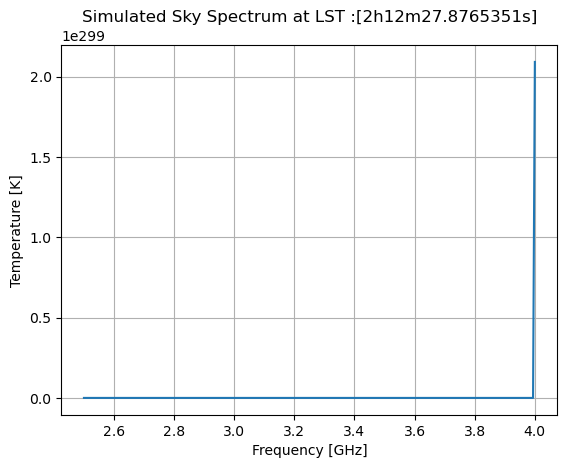

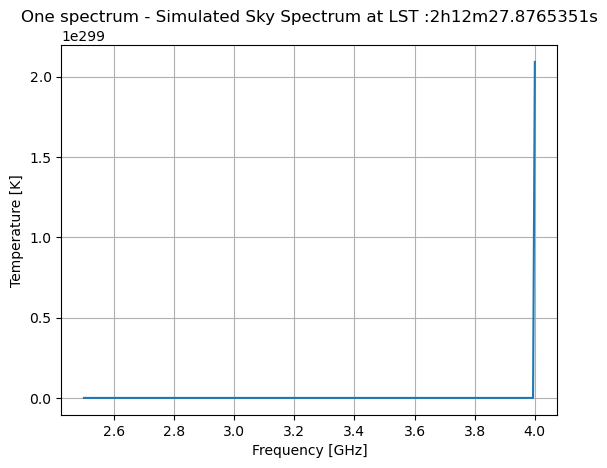

In [20]:
# newalt=np.zeros(NPIX)
# sindex=np.zeros(NPIX)
# t=0
# while t<n_spectra:
#     j=0
#     while j< No_of_Channels:
#         i=0
#         while i<NPIX:
#             if (j==0):
#                 coords = hp.pixelfunc.pix2ang(16, i , nest = True, lonlat = True)
#                 gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
#                 equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
#                 alt = equi.alt.value
#                 new_alt = refraction(alt, altitude)
#                 newalt[i]=new_alt
#                 def func(xx, a):
#                     return (sky_408)[i-1] * np.power((xx/0.408), a)     #Tsky(freq)=T408(f/f408)^(-a)

#                 xx = np.array([0.408, 1.420, 23])
#                 yy = np.array([sky_408[i-1], sky_1420[i-1], sky_23000[i-1]])

#                 popt, pcov = curve_fit(func, xx, yy)
#                 sindex[i]=popt
        
#             cwt = beam_def(freqs[j], newalt[i], longitudes)
#             if (cwt>0):     #Adding all three intensities at all positive beam weights

#                 map_1 = (2*k*1e+18 * (freqs[j]**2) *sky_408[i-1]* np.power(freqs[j]/0.408, float(sindex[i])))/ (c**2)
#                 tot_intensity=map_1 + CMB_Int[j]+Rec_int[j]
#                 conv_beamxsky=tot_intensity*cwt#* (1 - np.power(gamma_func(freqs[j]),2))
#                 Power = (conv_beamxsky) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
#                 final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot                
#                 cross_real[j] = cross_real[j] + final_temp
#                 sumwt[j] = sumwt[j]+ cwt
#                 #print("inside loop pixel and no.",i)
#             i+=1

#         if sumwt[j]>0:
#             cross_real[j] = cross_real[j]/sumwt[j]


#         j+=1

#     sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)
#     array = np.random.normal(0,1,No_of_Channels)

#     cross_real = cross_real + array*sigma       #cross_real has Tsky
#     cross_imag = cross_imag + array*sigma       #cross_imag has noise (to keep track of noise terms, which is also added to real part)
    
#     spectra_new[t] = cross_real
#     spectra_cross_imag[t] = cross_imag
#     print(cross_real[0])
#     print(cross_real[1])
    
#     cross_real = [0]*No_of_Channels
#     cross_imag = [0]*No_of_Channels
#     sumwt = [0]*No_of_Channels
#     sigma = [0]*No_of_Channels   #assigning all the above 4 parameters to zero valued arrays
    
#     print("No. of spectra got = ", t+1)
#     t+=1
# Obs = ephem.Observer()
# t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
# lst = t.sidereal_time('apparent')
    

# i=0
# while(i<n_spectra):
#     plt.plot(freqs, spectra_new[i])
#     i=i+1
    
# plt.xlabel('Frequency [GHz]')
# plt.ylabel('Temperature [K]')
# plt.title('Simulated Sky Spectrum at LST :%s'%lst)
# plt.grid()
# plt.show()

# plt.plot(freqs, spectra_new[0])
# plt.xlabel('Frequency [GHz]')
# plt.ylabel('Temperature [K]')
# plt.title('One spectrum - Simulated Sky Spectrum at LST :%s'%lst[0])
# plt.grid()
# plt.show()






(1, 251)


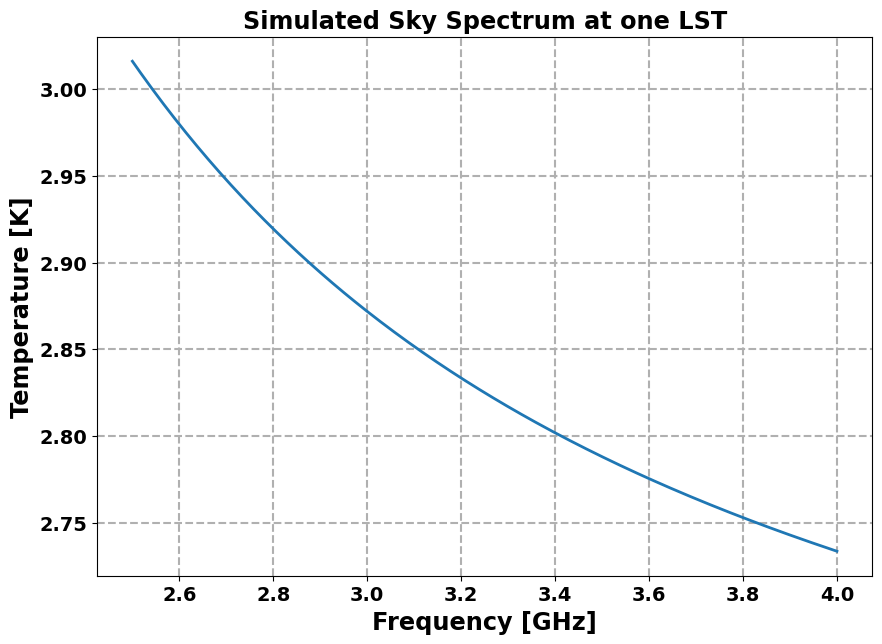

In [77]:


print(np.shape(spectra))

plt.figure(figsize=(10, 7))
plt.plot(freqs, spectra[0],linewidth=2)
plt.xlabel('Frequency [GHz]', fontsize='xx-large', fontweight='bold')
plt.ylabel('Temperature [K]', fontsize='xx-large', fontweight='bold')
plt.title('Simulated Sky Spectrum at one LST', fontsize='xx-large', fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')

plt.show()

## <div align="center"><b> Fitting with MS_fit function: CMB + smooth fit </b></div>


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import random as rndm
from math import exp, expm1, sqrt
from math import factorial as mf
from scipy.optimize import fmin
from scipy import interpolate
from matplotlib.backends.backend_pdf import PdfPages

PI=scipy.constants.pi
HH=scipy.constants.h
KK=scipy.constants.k
HbK=HH/KK
HbK9=HbK*1.0e9

## Please check the range of frequencies you are working with. Change the x1 and x2 accordingly

X1 = 2.5
X2 = 4
print (' ')
print ('CAUTION: this version is hard-coded for freq range: ',X1,' to ',X2,' GHz')

X1LOG = np.log10(X1)
X2LOG = np.log10(X2)
XDIF = X1LOG-X2LOG

np.set_printoptions(precision=20)

 
CAUTION: this version is hard-coded for freq range:  2.5  to  4  GHz


In [79]:
func1 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 \
						  )

func2 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2  \
						  )

func3 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3  \
						  )

func4 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4  \
						  )

func5 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5  \
						  )

func6 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6  \
						  )

func7 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7  \
						  )
func8 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8)

func9 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9)

func10 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10)	

func11 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10+ \
					(p[12])*(np.log10(x)-X1LOG)**11)

func12 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10+ \
					(p[12])*(np.log10(x)-X1LOG)**11+ \
					(p[13])*(np.log10(x)-X1LOG)**12)	

# define the function to be minimized by scipy.optimize.fmin
chisq1 = lambda p, x, y: sqrt(((func1(p,x)-y)**2).sum()/float(len(x)))

chisq2 = lambda p, x, y: sqrt(((func2(p,x)-y)**2).sum()/float(len(x)))

def chisq3 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func3(p,x)-y)**2).sum()/float(len(x)))

def chisq4 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func4(p,x)-y)**2).sum()/float(len(x)))
	
def chisq5 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func5(p,x)-y)**2).sum()/float(len(x)))
	
def chisq6 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func6(p,x)-y)**2).sum()/float(len(x)))

def chisq7 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func7(p,x)-y)**2).sum()/float(len(x)))

def chisq8 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) +  (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func8(p,x)-y)**2).sum()/float(len(x)))

def chisq9 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6 + (mf(9)/mf(7))*p[10]*(np.log10(x)-X1LOG)**7
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5 + \
		(mf(9)/mf(6))*p[10]*(np.log10(x)-X1LOG)**6
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4 + (mf(9)/mf(5))*p[10]*(np.log10(x)-X1LOG)**5
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3 + \
		(mf(9)/mf(4))*p[10]*(np.log10(x)-X1LOG)**4
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) + (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2 + \
	       (mf(9)/mf(3))*p[10]*(np.log10(x)-X1LOG)**3
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG) + (mf(9)/mf(2))*p[10]*(np.log10(x)-X1LOG)**2
	k8 = (mf(8)/mf(0))*p[9] + (mf(9)/mf(1))*p[10]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0 \
			or k8[i+1]*k8[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func9(p,x)-y)**2).sum()/float(len(x)))

def chisq10 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6 + (mf(9)/mf(7))*p[10]*(np.log10(x)-X1LOG)**7 + \
		(mf(10)/mf(8))*p[11]*(np.log10(x)-X1LOG)**8
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5 + \
		(mf(9)/mf(6))*p[10]*(np.log10(x)-X1LOG)**6 + (mf(10)/mf(7))*p[11]*(np.log10(x)-X1LOG)**7
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4 + (mf(9)/mf(5))*p[10]*(np.log10(x)-X1LOG)**5 + \
		(mf(10)/mf(6))*p[11]*(np.log10(x)-X1LOG)**6
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3 + \
		(mf(9)/mf(4))*p[10]*(np.log10(x)-X1LOG)**4 + (mf(10)/mf(5))*p[11]*(np.log10(x)-X1LOG)**5
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) + (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2 + \
	       (mf(9)/mf(3))*p[10]*(np.log10(x)-X1LOG)**3 + (mf(10)/mf(4))*p[11]*(np.log10(x)-X1LOG)**4
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG) + (mf(9)/mf(2))*p[10]*(np.log10(x)-X1LOG)**2 + \
	    (mf(10)/mf(3))*p[11]*(np.log10(x)-X1LOG)**3
	k8 = (mf(8)/mf(0))*p[9] + (mf(9)/mf(1))*p[10]*(np.log10(x)-X1LOG) + (mf(10)/mf(2))*p[11]*(np.log10(x)-X1LOG)**2
	k9 = (mf(9)/mf(0))*p[10] + (mf(10)/mf(1))*p[11]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0 \
			or k8[i+1]*k8[i]< 0.0 or k9[i+1]*k9[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func10(p,x)-y)**2).sum()/float(len(x)))

In [80]:
residuals = []
x0 = freqs
x0 = np.asfarray(x0)
x0log = np.log10(x0)


low=0.05
high=10


i_low=0
i_high=len(x0)
for i in range(0, len(x0)):
	if x0[i]<=low:
		i_low=i
	if x0[i]<=high:
		i_high=i
print("Limits in index: ",i_low,i_high)
x1=x0[i_low:i_high]
x1log = np.log10(x1)
X1=(x1log[0])
print(x1log.size)


Limits in index:  0 250
250


251
Check if the graph plotted looks smooth if beam correction is done
251
251


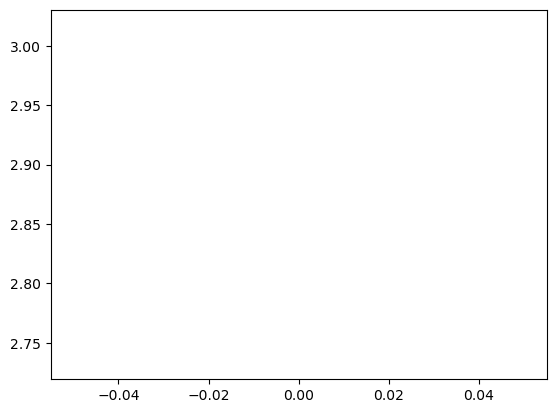

In [88]:
x1 = x0
x1log = np.log10(x1)


y1 = np.array(spectra)
print(y1.size)

## Here, we can just choose to fit the spectrum we have (without beam correction). For that, uncomment the below line
y1log = np.log10(y1)


## Alternatively, we can correct for the S11, by fitting the gamma value and correcting the spectrum. For that, uncomment the below 4 lines 
#gamma_val_for_freqs = gamma_func(freqs)
#p = np.polyfit(freqs, 1 - np.power(gamma_val_for_freqs,2),50)
#gamma_val_fit = np.polyval(p, freqs) 
##for ii in range(0,12):  ## averaging spectrum over 12 spectra
#y1 = np.divide(spectra[0], gamma_val_fit)
    
#y1ave=np.average(y1,axis=0)
#print(y1ave.shape)

#y1 = np.divide(spectra, gamma_val_fit)

## Use one of the above at a time


#plt.plot(y1ave)
#plt.show()
plt.plot(y1)
y1log = np.log10(y1)

print('Check if the graph plotted looks smooth if beam correction is done')
print(x1log.size)
print(y1log.size)

In [89]:
		p12 = np.poly1d(np.polyfit(x1log, y1log, 10))
		yfit_poly = p12(x1log)
		yres_poly = (10.0**yfit_poly) - y1
		#plt.figure()
		#plt.grid()
		#plt.xlabel('Freq [MHz]')
		#plt.ylabel('res Temp [K]')
		#plt.plot(x1*1.0e3,yres_poly,lw=2)
        #plt.plot(np.log10(nu),np.log10(T[pix]),'ro')
		#plt.title('Polyo10 residual spec %s'%(i))
		# plt.show()
		#pdf.savefig()
		#plt.close()
		# Initial guess for optimization				
		p00 = [np.log10(3.0),1.0,-2.5] 
		
		p1 = fmin(chisq1, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq1, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq1, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
		current_chisq = chisq1(p1,x1,y1)
		print (" ")
		print ("chisq1 = ",current_chisq)
		print (10.0**p1[0], p1[1], p1[2])
		print (" ")

		p00 = [p1[0],p1[1],p1[2],0.0] 
		p1 = fmin(chisq2, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq2, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq2, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
		final_chisq = chisq2(p1,x1,y1)
		print (" ")
		print ("chisq2 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3])
		print (" ")

		p00 = [p1[0],p1[1],p1[2],p1[3],0.0]
		p1 = fmin(chisq3, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq3, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq3, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
		final_chisq = chisq3(p1,x1,y1)
		print (" ")
		print ("chisq3 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4])
		print (" ")

		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],0.0]
		p1 = fmin(chisq4, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq4, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq4, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
		final_chisq = chisq4(p1,x1,y1)
		print (" ")
		print ("chisq4 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5])
		print (" ")

		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],p1[5],0.0]
		p1 = fmin(chisq5, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq5, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq5, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
		final_chisq = chisq5(p1,x1,y1)
		print (" ")
		print ("chisq5 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6])
		print (" ")

		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],p1[5],p1[6],0.0]
		p1 = fmin(chisq6, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq6, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq6, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
		final_chisq = chisq6(p1,x1,y1)
		print (" ")
		print ("chisq6 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7])
		print (" ")

		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],p1[5],p1[6],p1[7],0.0]
		p1 = fmin(chisq7, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq7, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq7, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
		final_chisq = chisq7(p1,x1,y1)
		print (" ")
		print ("chisq7 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8])
		print (" ")
				
		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],p1[5],p1[6],p1[7],p1[8],0.0]
		p1 = fmin(chisq8, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
		final_chisq = chisq8(p1,x1,y1)
		print (" ")
		print ("chisq8 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9])
		
		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],p1[5],p1[6],p1[7],p1[8],p1[9],0.0]
		p1 = fmin(chisq9, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
		final_chisq = chisq9(p1,x1,y1)
		print (" ")
		print ("chisq9 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9],p1[10])
			
		p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],p1[5],p1[6],p1[7],p1[8],p1[9],p1[10],0.0]
		p1 = fmin(chisq10, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
		final_chisq = chisq10(p1,x1,y1)
		print (" ")
		print ("chisq10 = ",final_chisq)
		print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9],p1[10],p1[11])
		print (" ")

		yfit = func10(p1,x1)
		yres = y1 - yfit
		#residuals.append(yres) 
		# scale = 0.03/chisq12(p1,x1,y1)
		# y2 = yfit + scale*(1.0e5**yres)
		yfitlog=np.log10(yfit)
        
residuals = np.asfarray(residuals)
print(residuals)

sp1 = y1 -yfit

plt.plot(freqs, sp1)
plt.ylabel('Temperature (K)')
plt.xlabel('Frequency (GHz)')
plt.title('Residual after fitting with a smooth function')
plt.show()

TypeError: expected x and y to have same length

In [90]:
sp1 = y1 -yfit

#plt.plot(freqs, sp1)
#plt.ylabel('Temperature (K)')
#plt.xlabel('Frequency (GHz)')
#plt.title('Residual after fitting with a smooth function')
#plt.show()
plt.figure(figsize=(10, 7))
plt.plot(freqs, sp1* 1e+03, linewidth=2.0)
plt.ylabel('Temperature (mK)', fontsize='xx-large', fontweight='bold')
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()
plt.show()
#print(sp1*1e+3)


NameError: name 'yfit' is not defined

In [16]:
import numpy as np
import os
import sys

file = 'ms_fit_joint_inf.py'
sys.path.insert(1, PATH)
from misc import RMS_data

rms=RMS_data(np.ones(len(sp1)), sp1)
print(rms*1e3,'mK')


import numpy as np
zipped=np.column_stack([freqs,sp1,y1,spectra[0]])
#zipped=np.column_stack([spectra])

np.savetxt(datafile_path , zipped)




0.11548147114453526 mK


Text(0.5, 1.0, 'The comparison of Spectrum after convolution with sky')

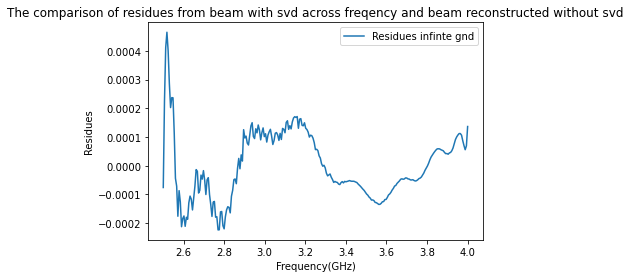

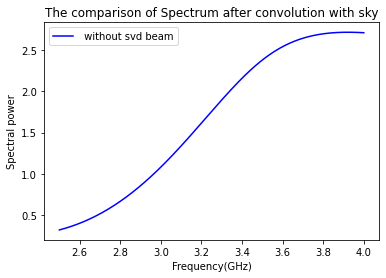

In [17]:
## this cell is just for comparing other residues This need not be run 

from misc import RMS_data
#res1,spectra1=np.loadtxt("/home/linux2/Downloads/Farfield/Farfield_infinite ground/ff/residues.txt",usecols=(1,2),unpack=True)
#res2,spectra2=np.loadtxt("/home/linux2/Downloads/Farfield/farfield_finite/140mm_ground/residues.txt",usecols=(1,2),unpack=True)

res2,spectra2 = np.loadtxt("/home/mayuris/workspace/RRI_DISTORTION_Lab/APSERa/Keerthi_thesis/residues_final.txt",usecols=(1,2),unpack=True)
#sp1,spectra[0]=np.loadtxt("/home/linux2/Downloads/Farfield/svd/5theigen/residues5theigen.txt",usecols=(1,2),unpack=True)
#plt.plot(freqs,res1)
#plt.plot(freqs,sp1)
plt.plot(freqs,res2)
plt.xlabel('Frequency(GHz)');
plt.ylabel('Residues');
plt.legend(['Residues infinte gnd','Residues finite gnd','finite ground 35um'])
plt.title('The comparison of residues from beam with svd across freqency and beam reconstructed without svd')

plt.figure()
#plt.plot(freqs,spectra1,'ro')
plt.plot(freqs,spectra[0],'b-')
plt.xlabel('Frequency(GHz)');
plt.ylabel('Spectral power');
plt.legend([' without svd beam','3th eigen svd'])
plt.title('The comparison of Spectrum after convolution with sky')

#difference1=res1-sp1
#difference2=spectra1-spectra[0]

# plt.figure()
# plt.plot(freqs,difference1)
# plt.title('Difference between residues')


# plt.figure()
# plt.plot(freqs,difference2)
# plt.title('Difference between sky spectra')
# print(freqs[40])
# rms_dat=rms = RMS_data(np.ones(len(sp1[40:251])), sp1[40:251])
# print("rms",rms_dat*1000)